### grid_search - demo modules



In [1]:
from fastai2.vision.all import *
import time
import copy
import pickle

In [20]:
%load_ext autoreload
%autoreload 2

from ..modules.trainutils import init_trainer, grid_exp
from ..modules.trainutils import stratify_sample, piece_class_parse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
path = Path('../../rf-chess-data/cropped_v1/')

##### doing `grid_exp` manually

In [9]:
test_seed = 42
test_n = 100

test = ImageDataLoaders.from_name_func(
                path, 
                stratify_sample(path, n=test_n, np_seed=test_seed),
                valid_pct=0.0, 
                seed=None,# randomSplitter has no effect
                label_func=piece_class_parse, 
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
                )

In [12]:
init_trainer(path, test, train_n=100, epochs=5)

training 100 samples from seed None ########

epoch:     0 | acc_t: 0.042 | acc_v: 0.042 | time: 18.678
epoch:     1 | acc_t: 0.083 | acc_v: 0.073 | time: 10.35
epoch:     2 | acc_t: 0.167 | acc_v: 0.146 | time:  9.98
epoch:     3 | acc_t:  0.25 | acc_v:  0.25 | time: 10.22
epoch:     4 | acc_t: 0.333 | acc_v: 0.302 | time: 16.39


In [19]:
init_trainer(path, test, train_n=50, epochs=5)

training 50 samples from seed None ########

epoch:     0 | acc_t: 0.062 | acc_v: 0.042 | time: 3.206
epoch:     1 | acc_t: 0.062 | acc_v: 0.042 | time:  2.99
epoch:     2 | acc_t: 0.062 | acc_v: 0.042 | time:  2.72
epoch:     3 | acc_t: 0.062 | acc_v: 0.042 | time: 2.877
epoch:     4 | acc_t: 0.062 | acc_v: 0.042 | time: 2.859


##### full search

In [42]:
d_exps = [
        {'train_n': 100, 'train_seed': None},
        {'train_n': 100, 'train_seed': None},
          ]

In [43]:
d = grid_exp(path,d_exps, epochs=5)


training 100 samples from seed None ########

epoch:     0 | acc_t: 0.115 | acc_v: 0.062 | time: 23.895
epoch:     1 | acc_t: 0.156 | acc_v: 0.125 | time: 17.355
epoch:     2 | acc_t: 0.198 | acc_v: 0.167 | time: 13.539
epoch:     3 | acc_t: 0.229 | acc_v: 0.188 | time: 11.927
epoch:     4 | acc_t: 0.312 | acc_v: 0.302 | time: 11.767

training 100 samples from seed None ########

epoch:     0 | acc_t: 0.104 | acc_v: 0.104 | time: 14.391
epoch:     1 | acc_t: 0.125 | acc_v: 0.104 | time: 13.629
epoch:     2 | acc_t: 0.219 | acc_v: 0.156 | time: 11.73
epoch:     3 | acc_t:  0.26 | acc_v: 0.229 | time: 12.066
epoch:     4 | acc_t: 0.302 | acc_v: 0.271 | time: 12.034


In [63]:
data_dir = '../data/exp-data/exp-1/'
with open(data_dir + 'grid-search-1.pkl', 'wb') as f:
    pickle.dump(d, f)

##### Plot results

In [110]:
colors = ['blue','green','red','magenta','yellow','black',]

In [111]:
data = [
    ('epochs=5', 'grid-search-1.pkl'),
    ('epochs=10', 'grid-search-2.pkl'),
]

d_exps = {}

for label, fn in data:
    
    with open(fn, 'rb') as f:
        tmp = pickle.load(f)
    
    d_exps[label] = tmp.get('exps', None)
        

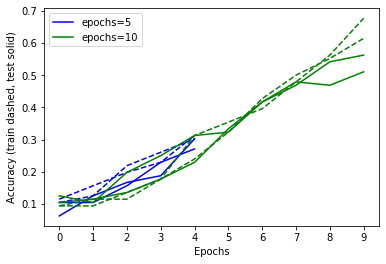

In [112]:
# exps = d['exps']
i = 0
for i, (label, exps) in enumerate(d_exps.items()):
    
    for acc_t in [e['acc_t'] for e in exps ]:
        _x = plt.plot(acc_t, c=colors[i], linestyle='--', label='train')

    for acc_v in [e['acc_v'] for e in exps ]:
        _y = plt.plot(acc_v, c=colors[i], linestyle='-', label='test')
    
plt.ylabel('Accuracy (train dashed, test solid)')
plt.xlabel('Epochs')
plt.xticks( list(range(len(acc_v)) )); 

handles = [mlines.Line2D([],[],c=colors[i]) 
            for i in range(len(d_exps.keys())) ]

plt.legend(handles, list(d_exps.keys()))
